In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Model A

In [3]:
pd.read_csv(f"../traces/OneWeek/B/prod/prod-nov5.csv")["ResolvedModelName"].value_counts()

ResolvedModelName
prod-gpt-4o-mini-2024-07-18    50000
Name: count, dtype: int64

In [4]:
pd.read_csv(f"../traces/OneWeek/C/prod-nov5.csv")["ResolvedModelName"].value_counts()

ResolvedModelName
prod-gpt-35-0125    50000
Name: count, dtype: int64

In [5]:
pd.read_csv(f"../traces/OneWeek/D/prod-nov5.csv")["ResolvedModelName"].value_counts()

ResolvedModelName
prod-gpt-4o-2024-05-13-chat-completions    50000
Name: count, dtype: int64

In [6]:
pd.read_csv(f"../traces/OneWeek/A/prod/prod-nov5.csv").head()

,TIMESTAMP,AOAIRequestId,Tenant,ScenarioName,Deployments,ResolvedModelName,ModelName,proddev,PromptTokenCount,CompletionTokenCount
0,2024-11-05T21:31:12.1328052Z,638c790f-0b88-4eb5-ab27-ca2ef86047cd,prod-westus,Word Basic Chat (Sydney),"centralus-gpt4-o-001,westus2-gpt4-o-001,westce...",prod-gpt-4o-2024-05-13,gpt4,prod,14969,4097
1,2024-11-05T23:03:52.9649437Z,e24c9f95-4405-47ac-946c-abc97484a3dd,prod-northcentralus,EnterpriseSydney,"eastus-gpt-4o-h100-flex-001,northcentralus-gpt...",prod-gpt-4o-2024-05-13,gpt,prod,35948,4096
2,2024-11-05T22:59:04.6954047Z,4bb244f8-87cd-4eb1-8b72-f5493b38b735,prod-northcentralus,EnterpriseSydney,"eastus-gpt-4o-h100-flex-001,northcentralus-gpt...",prod-gpt-4o-2024-05-13,gpt,prod,55420,4091
3,2024-11-05T22:59:48.191105Z,4e749956-8a8a-4b17-bd7b-6e392c9d07b0,prod-eastus,EnterpriseSydney,"eastus-gpt-4o-h100-flex-001,northcentralus-gpt...",prod-gpt-4o-2024-05-13,gpt,prod,14177,4055
4,2024-11-05T22:59:46.7804102Z,703fd6ca-2dc4-4c98-9bc0-fc6afad4458d,prod-northcentralus,EnterpriseSydney,"eastus-gpt-4o-h100-flex-001,northcentralus-gpt...",prod-gpt-4o-2024-05-13,gpt,prod,17257,3654


In [5]:
for i in range(5, 12):
    df = pd.concat([pd.read_csv(f"../traces/OneWeek/A/prod-nov{i}.csv"), pd.read_csv(f"../traces/OneWeek/A/dev-nov{i}.csv")])
    df["region"] = df["Deployments"].apply(lambda x: x.split("-")[0])
    print(i)
    print(df[["Tenant", "proddev"]].value_counts())

5
Tenant               proddev
sdf-westus           dev        27632
prod-westus          prod       19836
prod-northcentralus  prod       13628
prod-westus3         dev         9437
prod-eastus          prod        8620
                     dev         6118
prod-northcentralus  dev         2896
prod-westus          dev         2630
prod-japanwest       prod        2202
prod-australiaeast   prod        2083
prod-southcentralus  prod        1440
prod-brazilsouth     prod        1362
prod-southcentralus  dev         1214
prod-westus3         prod         516
prod-southindia      prod          94
prod-uaenorth        prod          91
prod-japaneast       prod          83
prod-japanwest       dev           46
prod-southeastasia   prod          44
prod-japaneast       dev           18
prod-brazilsouth     dev            8
prod-australiaeast   dev            1
sdf-westus           prod           1
Name: count, dtype: int64
6
Tenant               proddev
sdf-westus           dev        20933


In [6]:
dataframes = []
for i in range(5, 12):
    df = pd.concat([pd.read_csv(f"../traces/OneWeek/D/prod-nov{i}.csv"), pd.read_csv(f"../traces/OneWeek/D/dev-nov{i}.csv")])
    df["region"] = df["Deployments"].apply(lambda x: x.split("-")[0])
    dataframes.append(df)
df = pd.concat(dataframes)

In [7]:
df["TIMESTAMP"] = pd.to_datetime(df["TIMESTAMP"])

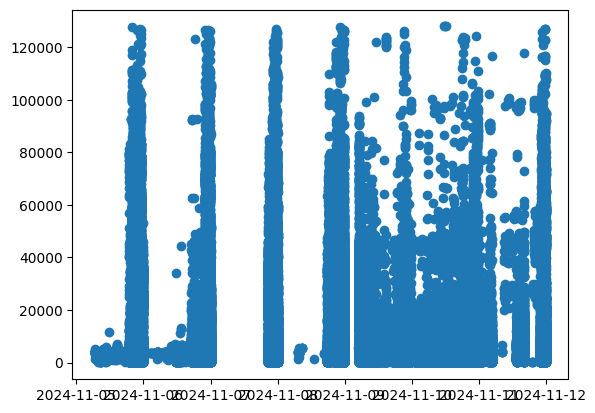

In [8]:
plt.scatter(df["TIMESTAMP"], df["PromptTokenCount"] + df["CompletionTokenCount"])

In [9]:
import numpy as np

In [10]:
timestamps_withoutnoise = np.random.gamma(6, 18*6*60, 100000)

In [11]:
timestamps_withoutnoise.mean()

38740.67758862905

In [12]:
noise = np.random.normal(0, 60*60, 100000)

In [204]:
timestamps = (timestamps_withoutnoise + noise).clip(min=0, max=24*60*60)

(array([  669.,  5750., 15652., 22060., 20784., 15510.,  9421.,  5344.,
         2653.,  2157.]),
 array([    0.,  8640., 17280., 25920., 34560., 43200., 51840., 60480.,
        69120., 77760., 86400.]),
 <BarContainer object of 10 artists>)

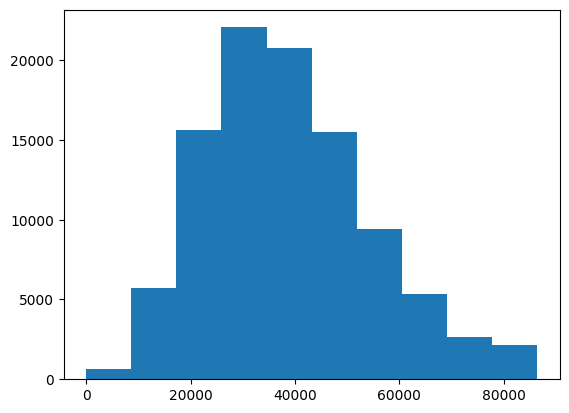

In [205]:
plt.hist(timestamps)

In [206]:
dataframes = []
for i in range(5, 6):
    df = pd.concat([pd.read_csv(f"../traces/OneWeek/A/prod-nov{i}.csv"), pd.read_csv(f"../traces/OneWeek/A/dev-nov{i}.csv")])
    df["region"] = df["Deployments"].apply(lambda x: x.split("-")[0])
    dataframes.append(df)
df = pd.concat(dataframes)

In [211]:
df["TIMESTAMP"] = timestamps
df["TIMESTAMP"] = df["TIMESTAMP"].apply(lambda x: x if x < 24*60*60 else np.random.random()*24*60*60)

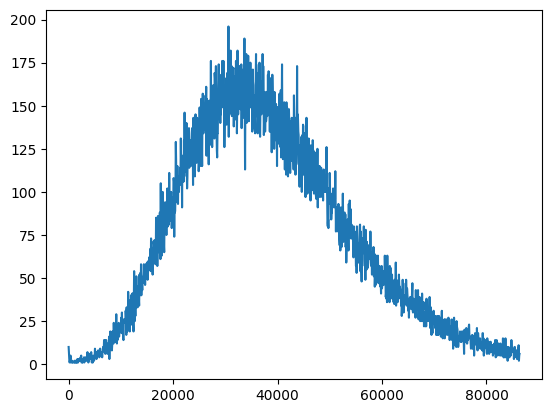

In [214]:
df["TIMESTAMP_int"] = df["TIMESTAMP"].apply(lambda x: (x // 60) * 60)
df_gb = df.groupby(by="TIMESTAMP_int").agg({"PromptTokenCount": "sum", "CompletionTokenCount": "sum", "AOAIRequestId": "count"}).reset_index()
# plt.plot(df_gb["TIMESTAMP_int"], df_gb["PromptTokenCount"] + df_gb["CompletionTokenCount"])
plt.plot(df_gb["TIMESTAMP_int"], df_gb["AOAIRequestId"])